 ## 1. Préparation et nettoyage

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('supermarket_sales.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
for column in df.columns:
	print(column)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.Date = pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time)
df.Time = df.Time.dt.hour

columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for column in columns:
	df[column] = df[column].astype('category')

df.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_17564\4004090575.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Time = pd.to_datetime(df.Time)


Invoice ID                         object
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                                int32
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [9]:
df['day'] = df.Date.dt.day
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [10]:
df.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18,Ewallet,597.73,4.761905,29.8865,4.1,25,3,2019
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14,Ewallet,413.04,4.761905,20.6520,5.8,25,2,2019
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11,Ewallet,735.60,4.761905,36.7800,8.0,24,2,2019
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17,Credit card,72.52,4.761905,3.6260,7.2,10,1,2019
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13,Credit card,164.52,4.761905,8.2260,5.9,20,2,2019


## 2. Analyse Exploratoire Univariée

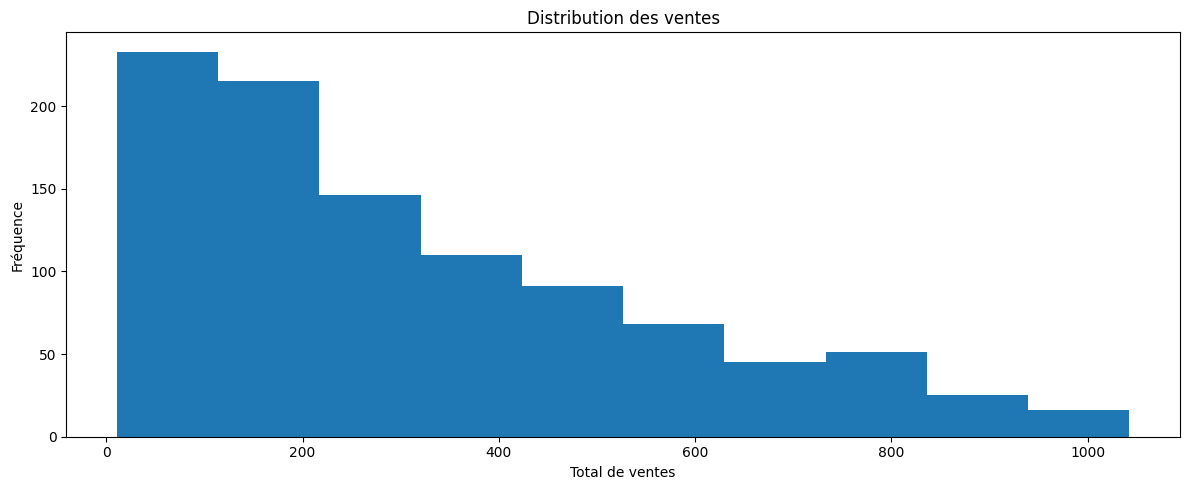

In [11]:
#Distribution des ventes

plt.figure(figsize=(12, 5))

plt.hist(df['Total'])

plt.title('Distribution des ventes')
plt.xlabel('Total de ventes')
plt.ylabel('Fréquence')

plt.tight_layout()

plt.show()

In [12]:
# Chiffre d'affaire total du supermarche

CA = df.Total.sum()

print(f'le chiffre d\'affaire total du super marché est : {CA}')

le chiffre d'affaire total du super marché est : 322966.749


In [13]:
# Ventes realisées par ville

ventes_par_ville = df.City.value_counts()

print(f'Ventes realises par ville : \n\n {ventes_par_ville}')

Ventes realises par ville : 

 City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


In [14]:
# Les 3 produits les plus vendus en volume
top_volume_ventes = df['Product line'].value_counts().head(3)
print(f'Les 3 produits les plus vendus en volume : \n\n {top_volume_ventes}')


# Les 3 produits les plus vendus en valeur
top_valeur_ventes = df.groupby('Product line')['Total'].sum()
top_valeur_ventes.sort_values(ascending = False, inplace = True)
print(f'\n\n Les 3 produits les plus vendus en valeur :\n\n {top_valeur_ventes.head(3)}')


Les 3 produits les plus vendus en volume : 

 Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Name: count, dtype: int64


 Les 3 produits les plus vendus en valeur :

 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Name: Total, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17564\4231206543.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_valeur_ventes = df.groupby('Product line')['Total'].sum()


In [15]:
# L'heure la plus active(avec le plus de ventes)
most_actve_hour = df['Time'].value_counts().sort_values(ascending = False).head(1).reset_index()
print(f"L'heure la plus active(avec le plus de ventes) : \n\n {most_actve_hour}")

L'heure la plus active(avec le plus de ventes) : 

    Time  count
0    19    113


In [16]:
# La moyenne du total des ventes par genre
ventes_par_genre = df.groupby('Product line')['Total'].mean().sort_values(ascending = False)
print(f"La moyenne du total des ventes par genre : \n\n {ventes_par_genre.round(2)}")

La moyenne du total des ventes par genre : 

 Product line
Home and lifestyle        336.64
Sports and travel         332.07
Health and beauty         323.64
Food and beverages        322.67
Electronic accessories    319.63
Fashion accessories       305.09
Name: Total, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17564\1545818429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventes_par_genre = df.groupby('Product line')['Total'].mean().sort_values(ascending = False)


In [17]:
# Les modes de paiemaent les plus frequents
most_use_payment = df['Payment'].value_counts()
print(f"Les modes de paiemaent les plus frequents : \n\n {most_use_payment}")

Les modes de paiemaent les plus frequents : 

 Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


## 3. Analyse Temporelle

In [18]:
# Les heures d’affluence
heures_affluence = df.Time.value_counts()

print(f"Les heures d'affluence : \n\n {heures_affluence.reset_index()}")


Les heures d'affluence : 

     Time  count
0     19    113
1     13    103
2     15    102
3     10    101
4     18     93
5     11     90
6     12     89
7     14     83
8     16     77
9     20     75
10    17     74


In [19]:
# Les journées ou périodes de vente les plus importantes
jour_ventes_importantes = df.day.value_counts().sort_values(ascending=False)

print(f"Les journées ou périodes de vente les plus importantes : \n\n  {jour_ventes_importantes}")

Les journées ou périodes de vente les plus importantes : 

  day
15    44
25    42
8     41
5     41
19    41
2     40
14    39
26    39
27    38
7     38
9     37
3     36
23    36
20    35
6     33
24    33
10    32
12    31
28    30
17    30
4     29
1     28
22    28
13    28
11    27
16    27
18    23
29    20
21    20
30    20
31    14
Name: count, dtype: int64


In [20]:
# Tendances mensuelles

tendances_mensuelles = df['month'].value_counts()

print(f"Tendances mensuelles : \n\n  {tendances_mensuelles}")

Tendances mensuelles : 

  month
1    352
3    345
2    303
Name: count, dtype: int64


## 4. Analyse par client / produit

### Comportements d'achat selon le genre

In [21]:
# Est-ce que les femmes depensent plus que les hommes
depenses = df.groupby('Gender')['Total'].sum()

print(f'Dépenses Hommes VS Femmes : \n\n {depenses.reset_index()}')
print('\n Les femmes depensent plus que les hommes')

Dépenses Hommes VS Femmes : 

    Gender       Total
0  Female  167882.925
1    Male  155083.824

 Les femmes depensent plus que les hommes


C:\Users\HP\AppData\Local\Temp\ipykernel_17564\3166113354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depenses = df.groupby('Gender')['Total'].sum()


In [22]:
# Y a-t-il des préférences produits par genre ?
df['Product line'] = df['Product line'].astype('string')
preferences = df.pivot_table(
	index = 'Gender',
	values = 'Total',
	columns = 'Product line'
)

print(f"préférences produits par genre : \n\n { preferences.reset_index()}")

préférences produits par genre : 

 Product line  Gender  Electronic accessories  Fashion accessories  \
0             Female              322.643125           317.056250   
1               Male              316.691965           291.079207   

Product line  Food and beverages  Health and beauty  Home and lifestyle  \
0                     368.565750         290.015414          380.213639   
1                     273.499125         348.099460          294.136241   

Product line  Sports and travel  
0                    324.712739  
1                    340.360327  


C:\Users\HP\AppData\Local\Temp\ipykernel_17564\4112015443.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  preferences = df.pivot_table(


### Différences entre les villes 

In [23]:
# Quelle ville génère le plus de chiffre d'affaires
City_CA = df.groupby('City')['Total'].sum().sort_values(ascending = False)

print(f"La ville qui génère le plus de chiffre d'affaires est : \n\n {City_CA.head(1).round(2)} ")

La ville qui génère le plus de chiffre d'affaires est : 

 City
Naypyitaw    110568.71
Name: Total, dtype: float64 


C:\Users\HP\AppData\Local\Temp\ipykernel_17564\1934397578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  City_CA = df.groupby('City')['Total'].sum().sort_values(ascending = False)


In [24]:
# Quelle ville a le plus grand nombre de clients ?
nbr_Client_ville = df['City'].value_counts()
print("Nbre e clients par villes : ", nbr_Client_ville)

print(f"\nLa ville qui a le plus grand nombre de clients est 'Yangon'")

Nbre e clients par villes :  City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

La ville qui a le plus grand nombre de clients est 'Yangon'


### Analyse par ligne de produits

In [25]:
# Les segments les plus rentables
segments_rentables = df.groupby('Product line')['Total'].sum().sort_values(ascending = False)

print(f"Les segmants les plus rentables sont : \n\n {segments_rentables}")

Les segmants les plus rentables sont : 

 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


In [26]:
# Le panier moyen par ligne de prosuit
panier_moyen = df.groupby('Product line')['Total'].mean().sort_values(ascending = False)

print(f"Le panier moyen par ligne de prosuit : \n\n {panier_moyen}")

Le panier moyen par ligne de prosuit : 

 Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64


## 5. Analyse multivariée

In [27]:
# Comparaison moyen des ventes par ligne de produits et genre

gender_x_product_mean_sales = df.pivot_table(
	index = "Product line",
	columns = "Gender",
	values = "Total",
	aggfunc = "mean"
)

print(f"Comparaison moyen des ventes par ligne de produits et genre :\n")

gender_x_product_mean_sales.round(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_17564\84775265.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gender_x_product_mean_sales = df.pivot_table(


Comparaison moyen des ventes par ligne de produits et genre :



Gender,Female,Male
Product line,,
Electronic accessories,322.64,316.69
Fashion accessories,317.06,291.08
Food and beverages,368.57,273.50
Health and beauty,290.02,348.10
Home and lifestyle,380.21,294.14
Sports and travel,324.71,340.36


In [28]:
# Comparaison moyen des ventes par ville et heure de vente
city_x_hour_mean_sales = df.pivot_table(
	index = "City",
	columns = "Time",
	values = "Total",
	aggfunc = "mean"
)

print("Comparaison moyen des ventes par ville et heure de vente : \n")
city_x_hour_mean_sales.round(2)

Comparaison moyen des ventes par ville et heure de vente : 



C:\Users\HP\AppData\Local\Temp\ipykernel_17564\1110640415.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  city_x_hour_mean_sales = df.pivot_table(


Time,10,11,12,13,14,15,16,17,18,19,20
City,,,,,,,,,,,
Mandalay,340.99,317.63,339.02,296.64,389.82,320.04,242.56,392.05,273.01,325.25,284.00
Naypyitaw,306.68,388.44,261.46,382.56,367.19,292.87,365.47,280.02,361.12,364.08,358.85
Yangon,294.96,324.28,287.43,336.90,354.10,304.69,339.68,334.95,225.67,382.60,268.02


## 6. Visualisations

### Barplots des produits vendus

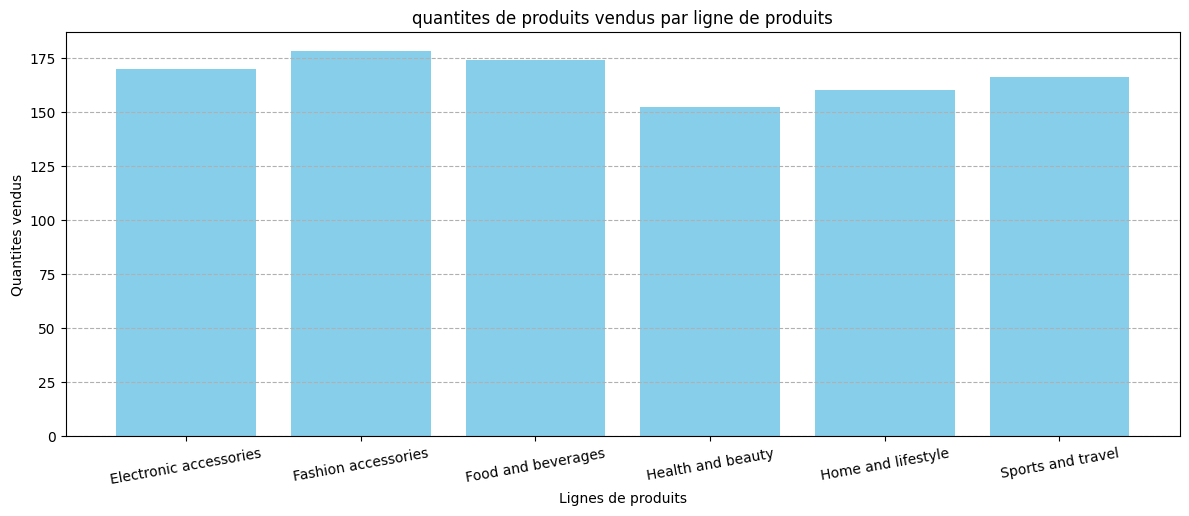

In [29]:
# Barplot des quantites de produits vendus
quantity_by_productline = df.groupby('Product line')['Quantity'].count().reset_index()

plt.figure(figsize=(12,5))

plt.bar(quantity_by_productline['Product line'], quantity_by_productline['Quantity'], color='skyblue')

plt.title("quantites de produits vendus par ligne de produits")
plt.xlabel("Lignes de produits")
plt.ylabel('Quantites vendus')

plt.tight_layout()
plt.xticks(rotation = 10)
plt.grid(axis='y', linestyle='--')

plt.show()

### Visualisation du traffic client

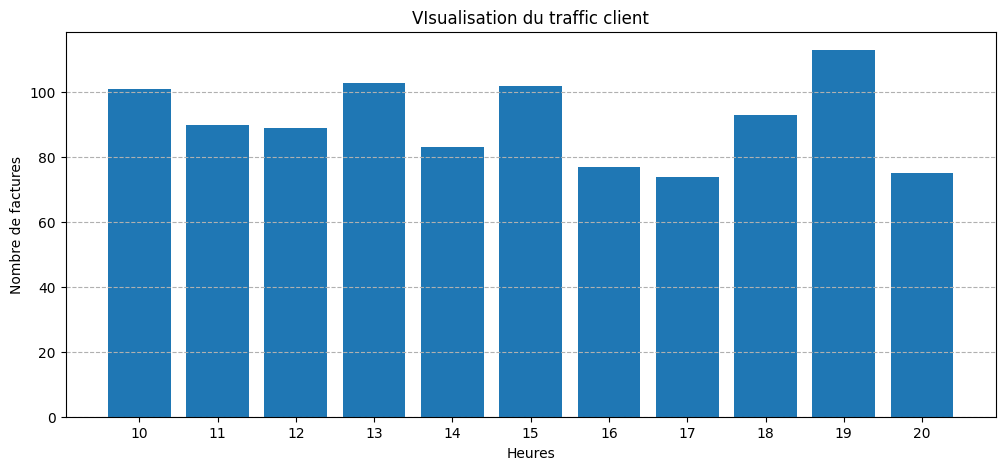

In [30]:
# Histogramme des heures les plus actives
plt.figure(figsize=(12,5))

hour = heures_affluence.reset_index()

plt.bar(hour['Time'], hour['count'])

plt.title("VIsualisation du traffic client")
plt.xlabel('Heures')
plt.ylabel('Nombre de factures')

plt.xticks(hour['Time'], hour['Time'])

plt.grid(axis='y', linestyle = '--')

plt.show()

### Courbes d’évolution du chiffre d'affaires

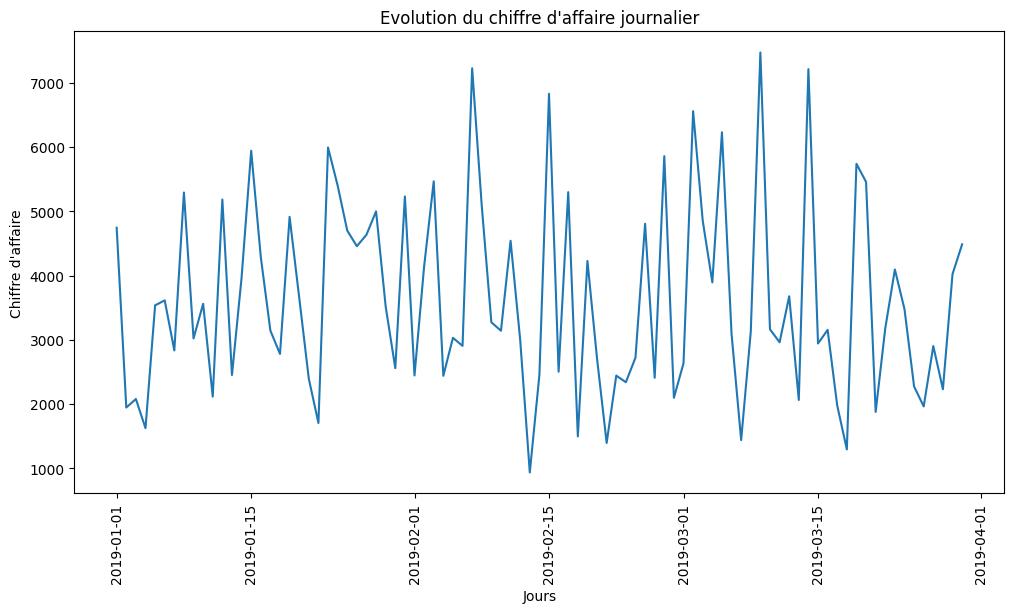

In [31]:
# Evolution du chiffre d'affaire journalier
CA = df.groupby('Date')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(CA['Date'], CA['Total'])

plt.title('Evolution du chiffre d\'affaire journalier')
plt.xlabel('Jours')
plt.ylabel('Chiffre d\'affaire')

plt.xticks( rotation = 90)

plt.show()

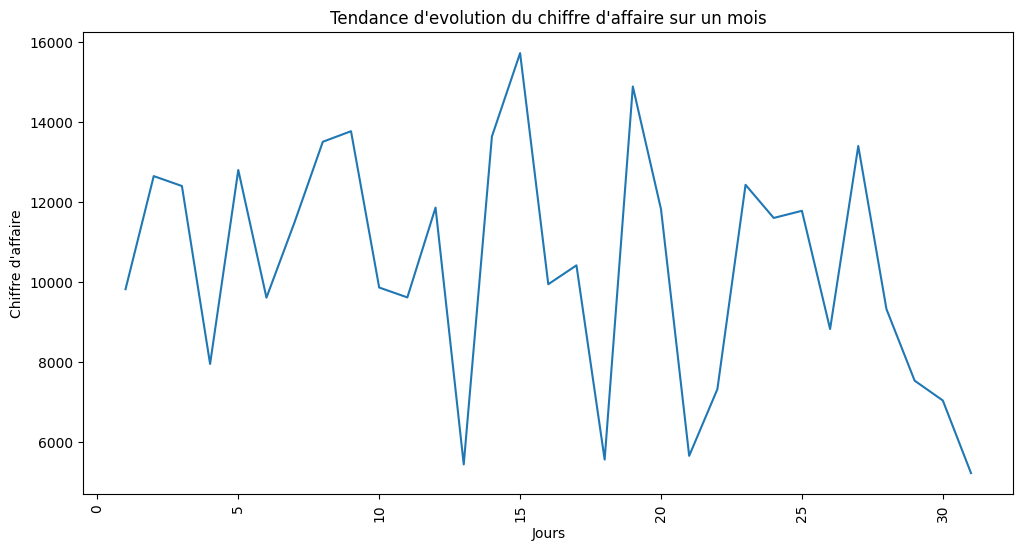

In [32]:
# Tendances d'evolution du chiffre d'affaire sur un mois
CA = df.groupby('day')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(CA['day'], CA['Total'])

plt.title('Tendance d\'evolution du chiffre d\'affaire sur un mois')
plt.xlabel('Jours')
plt.ylabel('Chiffre d\'affaire')

plt.xticks( rotation = 90)

plt.show()

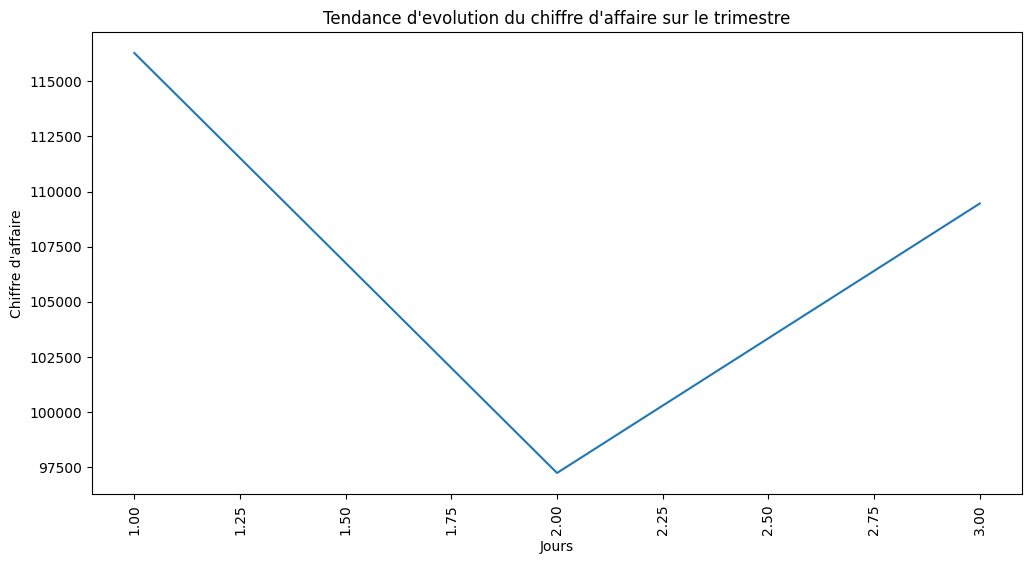

In [33]:
# Tendances d'evolution du chiffre d'affaire sur le trimestre
CA = df.groupby('month')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(CA['month'], CA['Total'])

plt.title('Tendance d\'evolution du chiffre d\'affaire sur le trimestre')
plt.xlabel('Jours')
plt.ylabel('Chiffre d\'affaire')

plt.xticks( rotation = 90)

plt.show()

### Camembert des modes de paiement

In [52]:
payment = df['Payment'].value_counts(normalize = True).reset_index()
payment

,Payment,proportion
0,Ewallet,0.345
1,Cash,0.344
2,Credit card,0.311


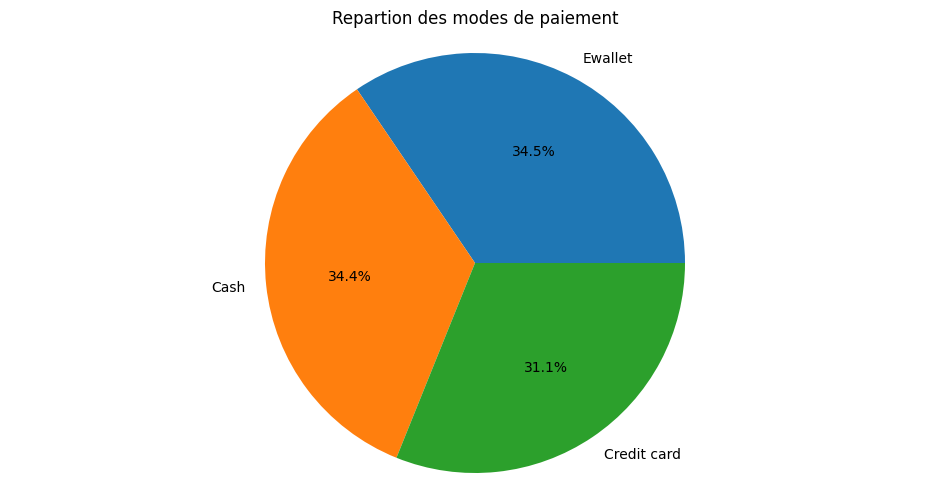

In [79]:
plt.figure(figsize=(12, 6))

plt.pie(payment['proportion'], labels=payment['Payment'], autopct='%1.1f%%')

plt.title('Repartion des modes de paiement')

plt.axis('equal')

plt.show()